In [2]:
# Importing Libraries
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
# Loading the IMDb dataset for sentiment analysis
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.imdb.load_data()

print('Training Dataset Shape: ', X_train.shape, Y_train.shape)
print('Test Dataset Shape: ', X_test.shape, Y_test.shape)

Training Dataset Shape:  (25000,) (25000,)
Test Dataset Shape:  (25000,) (25000,)


In [4]:
# Printing the X_train and X_test to see how it looks
print(X_train[0])
print(X_test[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
[1, 591, 202, 14, 31, 6, 717, 10, 10

-> So both the train and test for X is already tokenized and integer encoded.

In [5]:
# Let's see if the length are equal because LSTM would need same length sentences as input (no. of timesteps)
print(len(X_train[0]), len(X_train[1]), len(X_train[2]))
print(len(X_test[0]), len(X_test[1]), len(X_test[2]))

218 189 141
68 260 603


In [6]:
# Making sentence length equal (this would determine total number of timesteps)
# max_lengths = [max(len(x) for x in X_train), max(len(y) for y in X_test)]
# print(max_lengths)

# max_len = max(max_lengths)
# print(max_len)

-> The maximum sentence length in X set in 2494. So we have to pad all of them to 2494.

In [7]:
# Padding
X_train_padded = tf.keras.utils.pad_sequences(X_train, maxlen=1000, padding='post')
X_test_padded = tf.keras.utils.pad_sequences(X_test, maxlen=1000, padding='post')

print(X_train_padded.shape, X_test_padded.shape)
print(X_train_padded[0])
print(X_test_padded[0])

(25000, 1000) (25000, 1000)
[    1    14    22    16    43   530   973  1622  1385    65   458  4468
    66  3941     4   173    36   256     5    25   100    43   838   112
    50   670 22665     9    35   480   284     5   150     4   172   112
   167 21631   336   385    39     4   172  4536  1111    17   546    38
    13   447     4   192    50    16     6   147  2025    19    14    22
     4  1920  4613   469     4    22    71    87    12    16    43   530
    38    76    15    13  1247     4    22    17   515    17    12    16
   626    18 19193     5    62   386    12     8   316     8   106     5
     4  2223  5244    16   480    66  3785    33     4   130    12    16
    38   619     5    25   124    51    36   135    48    25  1415    33
     6    22    12   215    28    77    52     5    14   407    16    82
 10311     8     4   107   117  5952    15   256     4 31050     7  3766
     5   723    36    71    43   530   476    26   400   317    46     7
     4 12118  1029    1

In [8]:
# Checking the Y labels
print(Y_train[0], Y_train[1], Y_train[2])
print(Y_test[0], Y_test[1], Y_test[2])

1 0 0
0 1 1


In [9]:
# Total unique word count 
word_index = tf.keras.datasets.imdb.get_word_index()   # Gives a dictionary of all the words mapped to index
min([x for x in word_index.values()])

1

-> This shows that the indexing starts from 1.

In [10]:
vocab_size = len(word_index) + 1  # The zeroth index is mostly reserved for oov or pad token. We have to take it into account or else we will miss our last word in vocab.
print('Vocabulary Size: ', vocab_size)

Vocabulary Size:  88585


<hr>

## <b>LSTM Architecture</b>

In [12]:
# Building LSTM Architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=100, input_shape=(1000,)),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 1000, 100)           │       8,858,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 128)                 │         117,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,975,877 (34.24 MB)

 Trainable params: 8,975,877 (34.24 MB)

 Non-trainable params: 0 (0.00 B)

-> 88585x100 = 8,858,500<br>

ht-1=(1,128), xt=(1,100), [ht-1, xt]=(1,228)<br>
228x128x4 + 128x4 = 117,248  (Wf, Wi, Wc, Wo) <br>

128x1 + 1 = 129

In [13]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [14]:
history = model.fit(
    X_train_padded, Y_train,
    epochs=10,
    validation_data=(X_test_padded, Y_test)
)   # Default batch size is 32

Epoch 1/10


I0000 00:00:1751874077.074020     946 cuda_dnn.cc:529] Loaded cuDNN version 90300


782/782 ━━━━━━━━━━━━━━━━━━━━ 61s 74ms/step - accuracy: 0.5041 - loss: 0.6934 - val_accuracy: 0.5001 - val_loss: 0.6932
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 73ms/step - accuracy: 0.4975 - loss: 0.6945 - val_accuracy: 0.5003 - val_loss: 0.6953
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 73ms/step - accuracy: 0.5003 - loss: 0.6941 - val_accuracy: 0.4999 - val_loss: 0.6938
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 73ms/step - accuracy: 0.4953 - loss: 0.6933 - val_accuracy: 0.4997 - val_loss: 0.6946
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 73ms/step - accuracy: 0.4963 - loss: 0.6929 - val_accuracy: 0.5003 - val_loss: 0.6931
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 73ms/step - accuracy: 0.5029 - loss: 0.6919 - val_accuracy: 0.4998 - val_loss: 0.6933
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 73ms/step - accuracy: 0.5029 - loss: 0.6905 - val_accuracy: 0.5004 - val_loss: 0.6934
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 73ms/step - accuracy: 0.5010 - loss: 0.6906 - val_accurac

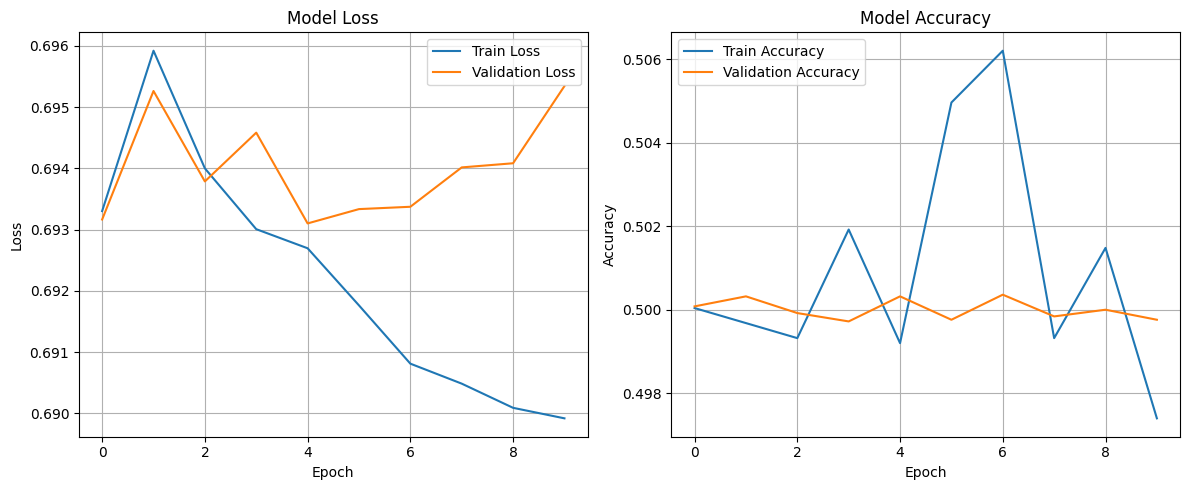

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(history.history['loss'], label='Train Loss')
axs[0].plot(history.history['val_loss'], label='Validation Loss')
axs[0].set_title('Model Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].grid(True)


axs[1].plot(history.history['accuracy'], label='Train Accuracy')
axs[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[1].set_title('Model Accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

-> So the model didn't learn anything.

<hr>